##Load and explore the data

# Precipitation Project

This project compares the rainfall between the cities of Seattle, WA and Grand Rapids, MI. The hypothesis is that Grand Rapids has as much or more rain than Seattle. This is of interest to someone not currently living in Seattle since Seattle is known as the "rainy city".

The project gets data from the following repository:
https://www.ncei.noaa.gov/cdo-web/search?datasetid=GHCND

As of October 5, 2025, the US government is still shut down. Access to the data from teh web site is uncertain, however the necessary data sets are available in this repository.

## Work Products
The project should contain artifacts that satisfy the following requirements:

- Inspect the contents of each data set.
- If necessary, convert data types of columns of the data frames to the correct types.
- Remove unnecessary parts of the data sets (e.g. duplicate entries, dates beyond the desired range, etc).
- Identify missing values in the data sets. Impute or remove NaN values, as appropriate.
- Join the Seattle and Other City data frames, keeping only the date and precipitation values.
- Ensure that the data frame is in a tidy, or long, format.
- Rename the columns, if necessary, to follow best practices of being lowercase, snake_case, and understandable.
- Create any derived variables that will be useful in the analysis.

Throughout this notebook, headers and notes will document the necessary details.


### Import libraries and set up plotting style

These are the necessary libraries needed for analysis.

In [108]:
# Import pandas, numpy, and matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# seaborn is a data visualization library built on matplotlib
import seaborn as sns

# set the plotting style
sns.set_style("whitegrid")

### Load the data

Let's load the data sets. The data sets are csv (comma separated values) files containing data for the two cities, Seattle and Grand Rapids. The data sets we are working with are located in this repository in the data section of the project.

##### Load the Seattle data set

We'll load the Seattle data set and then determine what type of object was created. In this case, it should be a panda DataFrame.

In [109]:
df_seattle = pd.read_csv('../data/seattle_rain.csv')
type(df_seattle)

pandas.core.frame.DataFrame

##### Load the Grand Rapids data set

We'll load the Grand Rapids data set and then determine what type of object was created. In this case, it should be a panda DataFrame.

In [110]:
df_grr = pd.read_csv('../data/grr_rain.csv')
type(df_grr)

pandas.core.frame.DataFrame

#### Explore the contents of the data sets

Let's now explore the data sets to see what we have. We begin by looking at the head. This will give us the first five rows of the data for Seattle and Grand Rapids. If you want to see more than the first few rows, you can always add a in value as part of the head() function.

By looking at the head, we can see the names of the columns and example values for each column.

In [111]:
df_seattle.head()

,STATION,NAME,DATE,DAPR,MDPR,PRCP,SNOW,SNWD,WESD,WESF
0,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/1/18,NaN,NaN,0.00,NaN,NaN,NaN,NaN
1,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/2/18,NaN,NaN,0.00,NaN,NaN,NaN,NaN
2,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/3/18,NaN,NaN,0.00,NaN,NaN,NaN,NaN
3,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/4/18,NaN,NaN,0.00,NaN,NaN,NaN,NaN
4,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/5/18,NaN,NaN,0.25,NaN,NaN,NaN,NaN


In [112]:
df_grr.head()

,STATION,NAME,DATE,PRCP,SNOW,SNWD
0,USC00206013,"NWSFO GRAND RAPIDS, MI US",2018-01-01,0.03,0.5,7.0
1,USC00206013,"NWSFO GRAND RAPIDS, MI US",2018-01-02,0.01,0.2,7.0
2,USC00206013,"NWSFO GRAND RAPIDS, MI US",2018-01-03,0.06,2.5,9.0
3,USC00206013,"NWSFO GRAND RAPIDS, MI US",2018-01-04,0.00,0.0,7.0
4,USC00206013,"NWSFO GRAND RAPIDS, MI US",2018-01-05,0.00,0.0,7.0


We can also just look at what the columns are. This is useful in a number of ways, one of which is to determine whether the data we're looking for is in the data set. Obviously, it should be noted that this will not always be the case, where data is properly documented with the column names.

In [113]:
df_seattle.columns

Index(['STATION', 'NAME', 'DATE', 'DAPR', 'MDPR', 'PRCP', 'SNOW', 'SNWD',
       'WESD', 'WESF'],
      dtype='object')

In [114]:
df_grr.columns

Index(['STATION', 'NAME', 'DATE', 'PRCP', 'SNOW', 'SNWD'], dtype='object')

As mentioned above, we'll look at at a few more rows of data to take a look and see what we have. Here we look at the first 10 rows of data for Seattle and Grand Rapids.

In [115]:
df_seattle.head(10)

,STATION,NAME,DATE,DAPR,MDPR,PRCP,SNOW,SNWD,WESD,WESF
0,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/1/18,NaN,NaN,0.00,NaN,NaN,NaN,NaN
1,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/2/18,NaN,NaN,0.00,NaN,NaN,NaN,NaN
2,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/3/18,NaN,NaN,0.00,NaN,NaN,NaN,NaN
3,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/4/18,NaN,NaN,0.00,NaN,NaN,NaN,NaN
4,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/5/18,NaN,NaN,0.25,NaN,NaN,NaN,NaN
5,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/6/18,NaN,NaN,0.57,NaN,NaN,NaN,NaN
6,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/7/18,NaN,NaN,0.23,NaN,NaN,NaN,NaN
7,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/8/18,NaN,NaN,0.41,NaN,NaN,NaN,NaN
8,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",3/12/18,NaN,NaN,0.00,NaN,NaN,NaN,NaN
9,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",3/13/18,NaN,NaN,0.00,NaN,NaN,NaN,NaN


In [116]:
df_grr.head(10)

,STATION,NAME,DATE,PRCP,SNOW,SNWD
0,USC00206013,"NWSFO GRAND RAPIDS, MI US",2018-01-01,0.03,0.5,7.0
1,USC00206013,"NWSFO GRAND RAPIDS, MI US",2018-01-02,0.01,0.2,7.0
2,USC00206013,"NWSFO GRAND RAPIDS, MI US",2018-01-03,0.06,2.5,9.0
3,USC00206013,"NWSFO GRAND RAPIDS, MI US",2018-01-04,0.00,0.0,7.0
4,USC00206013,"NWSFO GRAND RAPIDS, MI US",2018-01-05,0.00,0.0,7.0
5,USC00206013,"NWSFO GRAND RAPIDS, MI US",2018-01-06,0.00,0.0,7.0
6,USC00206013,"NWSFO GRAND RAPIDS, MI US",2018-01-07,0.08,0.4,7.0
7,USC00206013,"NWSFO GRAND RAPIDS, MI US",2018-01-08,0.19,1.9,8.0
8,USC00206013,"NWSFO GRAND RAPIDS, MI US",2018-01-09,0.00,0.0,7.0
9,USC00206013,"NWSFO GRAND RAPIDS, MI US",2018-01-10,0.05,0.0,3.0


#### Determine of the columns are the same

We'll use the `info` method to check the data types, size of the data frame, and numbers of missing values. As you will see in the data below, there are approximately 168 rows of data different bwetween the two cities. Seattle has some missing data and one can speculate on why that data is missing. For example, perhaps that station in Seattle had an outage for some number of days.

Nevertheless, the data sets indicate that the missing data should not be relevant to our comparison. Mostly, we see that the PRCP data is available and that is what we are comparing.

Taking a closer look, we see that the amount of data missing overall from the Seattle data base is 168 less than Grand Rapids. However, Seattle has 190 less PRCP data points than Seattle. It's uncertain why this difference exists, however, it could be, again, that some systems were down during this period or that there was an error in measurement in some cases.

In [117]:
df_seattle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1658 entries, 0 to 1657
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STATION  1658 non-null   object 
 1   NAME     1658 non-null   object 
 2   DATE     1658 non-null   object 
 3   DAPR     23 non-null     float64
 4   MDPR     23 non-null     float64
 5   PRCP     1636 non-null   float64
 6   SNOW     353 non-null    float64
 7   SNWD     66 non-null     float64
 8   WESD     15 non-null     float64
 9   WESF     28 non-null     float64
dtypes: float64(7), object(3)
memory usage: 129.7+ KB


In [118]:
df_grr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1826 entries, 0 to 1825
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STATION  1826 non-null   object 
 1   NAME     1826 non-null   object 
 2   DATE     1826 non-null   object 
 3   PRCP     1826 non-null   float64
 4   SNOW     1826 non-null   float64
 5   SNWD     1826 non-null   float64
dtypes: float64(3), object(3)
memory usage: 85.7+ KB


To get a better understanding of what the rows and columns are, let's see how many points of data (rows) Seattle and Grand Rapids have and how many different data points were collected (columns) in the two cities.

In [119]:
print(df_seattle.shape)
print(df_grr.shape)

(1658, 10)
(1826, 6)


#### Why are there differences between the Seattle and Grand Rapids data sets?

Without further investigation, it's difficult to say specifically why there are differences between the data set. Seattle certainly has some additional data points it's interested in compared to Grand Rapids. As mentioned before, missing data from Seattle could be a number of things:
- the station being down due to technical issues
- radiosonde (https://en.wikipedia.org/wiki/Radiosonde) flights not performed due to technical issues or lack of devices.
- something else

#### Examine the `STATION` column

Now, one of the things we could have done if the data sets were grossly mismatched would have been to check the STATION from which data was taken. It has been seen that some data sets include multiple STATIONS in the same data set.

As one can see, this is not the case in the Seattle and Grand Rapids data set. We see that there is one station for Seattle and one station for Grand Rapids.

In [120]:
df_seattle['STATION'].unique()

array(['US1WAKG0225'], dtype=object)

In [121]:
df_grr['STATION'].unique()

array(['USC00206013'], dtype=object)

#### Examine the `DATE` column

As with many dates, the format of said data might not be in the same format. We should check that to see what problems we might have if we need to compare dates.

As once can see below, the date information for Seattle is in the following format: month/date/year. The date information for Grand Rapids is in the following format: year-month-date.

This will cause some problems, so let's take a moment to convert to a common date format.

In [122]:
df_seattle['DATE'].max()
df_seattle['DATE'].tail()

1653    12/27/22
1654    12/28/22
1655    12/29/22
1656    12/30/22
1657    12/31/22
Name: DATE, dtype: object

In [123]:
df_grr['DATE'].max()
df_grr['DATE'].tail()

1821    2022-12-27
1822    2022-12-28
1823    2022-12-29
1824    2022-12-30
1825    2022-12-31
Name: DATE, dtype: object

### Convert `DATE` to datetime

We'll convert the DataFrame date to a datetime object. You'll see in the Seattle data that we get a warning. This warning is telling us that pandas could not automatically detect a consistent date format in the DATE column and therefore it's parsing each date individually using the dateutil library. This is fine for now. In future analysis, one might want to "fix" the format to imporove the speed of analysis.

#### Seattle DATE conversion

In [124]:
df_seattle['DATE'] = pd.to_datetime(df_seattle['DATE'])

/var/folders/_w/ms1g9gts2bl_shfc5qfpp7x40000gn/T/ipykernel_78870/2866334794.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_seattle['DATE'] = pd.to_datetime(df_seattle['DATE'])


#### Grand Rapids DATE conversion

In [125]:
df_grr['DATE'] = pd.to_datetime(df_grr['DATE'])

#### Let's check what the range of dates are.

We are supposed to be looking at data from 1/1/2018 to 12/31/2022. We'll check this for both Seattle and Grand Rapids.

In [126]:
df_seattle['DATE'].min()

Timestamp('2018-01-01 00:00:00')

In [127]:
df_seattle['DATE'].max()

Timestamp('2022-12-31 00:00:00')

In [128]:
df_grr['DATE'].min()

Timestamp('2018-01-01 00:00:00')

In [129]:
df_grr['DATE'].max()

Timestamp('2022-12-31 00:00:00')

In [130]:
df_seattle['DATE'].agg(['min', 'max'])

min   2018-01-01
max   2022-12-31
Name: DATE, dtype: datetime64[ns]

In [131]:
df_grr['DATE'].agg(['min', 'max'])

min   2018-01-01
max   2022-12-31
Name: DATE, dtype: datetime64[ns]

### Data Suitability

Having gone though all of this, can we assert that the data is suitable to answer the questions that we have? It seems that this is the case. There are a comparable number of data points available for us to look at. We have the necessary data that we are looking to analyze.

#### Plot the daily precipitation data for Seattle.

Let's use a lineplot.

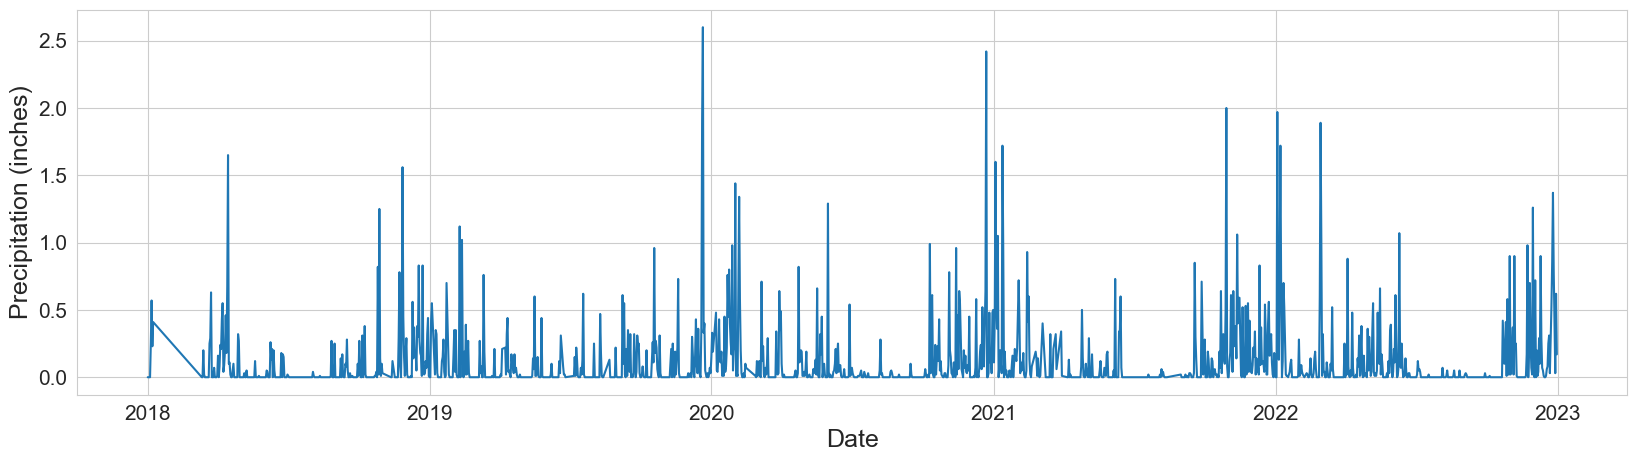

In [132]:
plt.figure(figsize = (20,5))
sns.lineplot(data=df_seattle, x='DATE', y='PRCP')

plt.xlabel('Date', fontsize = 18)
plt.ylabel('Precipitation (inches)', fontsize = 18)
plt.tick_params(labelsize = 15)
plt.show()

#### Plot the daily precipitation data for Grand Rapids

Let's use a lineplot

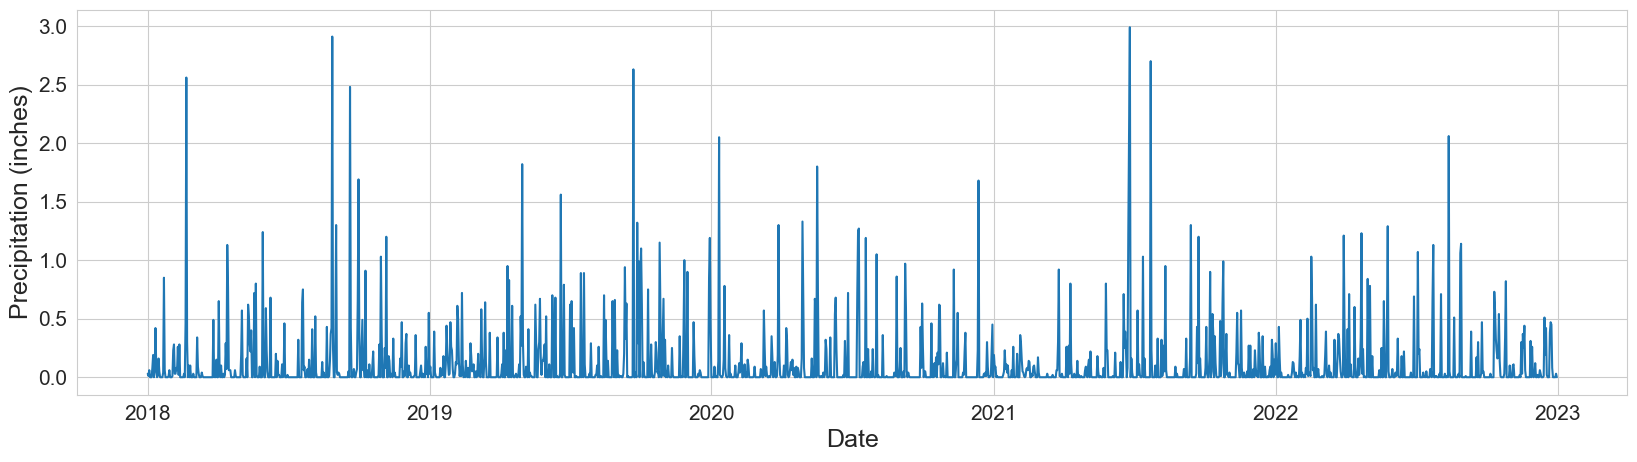

In [133]:
plt.figure(figsize = (20,5))
sns.lineplot(data=df_grr, x='DATE', y='PRCP')

plt.xlabel('Date', fontsize = 18)
plt.ylabel('Precipitation (inches)', fontsize = 18)
plt.tick_params(labelsize = 15)
plt.show()

#### Join data frames keeping `DATE` and `PRCP` columns

We'll combine the Seattle and Grand Rapids DATE and PRCP columns so that we can properly compare the actual data.

In [134]:
df_seattle.head(2)

,STATION,NAME,DATE,DAPR,MDPR,PRCP,SNOW,SNWD,WESD,WESF
0,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-01,NaN,NaN,0.0,NaN,NaN,NaN,NaN
1,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-02,NaN,NaN,0.0,NaN,NaN,NaN,NaN


In [135]:
df_grr.head(2)

,STATION,NAME,DATE,PRCP,SNOW,SNWD
0,USC00206013,"NWSFO GRAND RAPIDS, MI US",2018-01-01,0.03,0.5,7.0
1,USC00206013,"NWSFO GRAND RAPIDS, MI US",2018-01-02,0.01,0.2,7.0


##### Use a join to keep all dates present

Each DataFrame had a column named `PRCP`, so the default is to add suffixes _x and _y to differentiate the columns. Normally, we would rename the columns at this point to something more informative. However, we know that we want to convert the DataFrame to a tidy format and so we will modify the names later.

In [136]:
df = df_grr[['DATE', 'PRCP']].merge(df_seattle[['DATE', 'PRCP']], on='DATE', how='outer')

In [137]:
df.head()

,DATE,PRCP_x,PRCP_y
0,2018-01-01,0.03,0.00
1,2018-01-02,0.01,0.00
2,2018-01-03,0.06,0.00
3,2018-01-04,0.00,0.00
4,2018-01-05,0.00,0.25


### Create a tidy data frame with columns for city and precipitation

In [138]:
df = pd.melt(df, id_vars='DATE', var_name='city', value_name='precipitation')

### Rename columns or values to follow best practices

Rename the city values 'GRR' and 'SEA'

In [139]:
df.loc[df['city'] == 'PRCP_x', 'city'] = 'GRR'
df.loc[df['city'] == 'PRCP_y', 'city'] = 'SEA'

In [140]:
df.head()

,DATE,city,precipitation
0,2018-01-01,GRR,0.03
1,2018-01-02,GRR,0.01
2,2018-01-03,GRR,0.06
3,2018-01-04,GRR,0.00
4,2018-01-05,GRR,0.00


In [141]:
df.tail()

,DATE,city,precipitation
3647,2022-12-27,SEA,0.78
3648,2022-12-28,SEA,0.40
3649,2022-12-29,SEA,0.03
3650,2022-12-30,SEA,0.62
3651,2022-12-31,SEA,0.17


##### Rename the columns to be lowercase using `df.rename()`

## Identify and fill in missing values

Data can be missing in multiple manners:
1. Values are `NaN` in the data frame
2. Values are not included in the data set

Determine the number of non-null values in each column.

In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3652 entries, 0 to 3651
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   DATE           3652 non-null   datetime64[ns]
 1   city           3652 non-null   object        
 2   precipitation  3462 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 85.7+ KB


In [143]:
df.notna().sum()

DATE             3652
city             3652
precipitation    3462
dtype: int64

##### Determine the number of null values in each column.

In [144]:
df.isna().sum()

DATE               0
city               0
precipitation    190
dtype: int64

##### Determine the number of null precipitation values for Seattle and Grand Rapids.

In [145]:
df.loc[df['city'] == 'SEA', 'precipitation'].isna().sum()

np.int64(190)

In [146]:
df.loc[df['city'] == 'GRR', 'precipitation'].isna().sum()

np.int64(0)

##### The Grand Rapids data set does not have any `NaN` values of `precipitation`.

### Impute missing values

We will replace missing values with the mean across years of values on that day.


**Design an algorithm for replacing missing values with the mean across years of values on that day.**

In [168]:
df['day_of_year'] = pd.DatetimeIndex(df['DATE']).dayofyear

In [148]:
df.tail()

,DATE,city,precipitation,day_of_year
3647,2022-12-27,SEA,0.78,361
3648,2022-12-28,SEA,0.40,362
3649,2022-12-29,SEA,0.03,363
3650,2022-12-30,SEA,0.62,364
3651,2022-12-31,SEA,0.17,365


In [149]:
df.head(10)

,DATE,city,precipitation,day_of_year
0,2018-01-01,GRR,0.03,1
1,2018-01-02,GRR,0.01,2
2,2018-01-03,GRR,0.06,3
3,2018-01-04,GRR,0.00,4
4,2018-01-05,GRR,0.00,5
5,2018-01-06,GRR,0.00,6
6,2018-01-07,GRR,0.08,7
7,2018-01-08,GRR,0.19,8
8,2018-01-09,GRR,0.00,9
9,2018-01-10,GRR,0.05,10


In [150]:
mean_day_precipitation = df.loc[df['city'] == 'SEA',['precipitation','day_of_year']].groupby(['day_of_year']).mean()

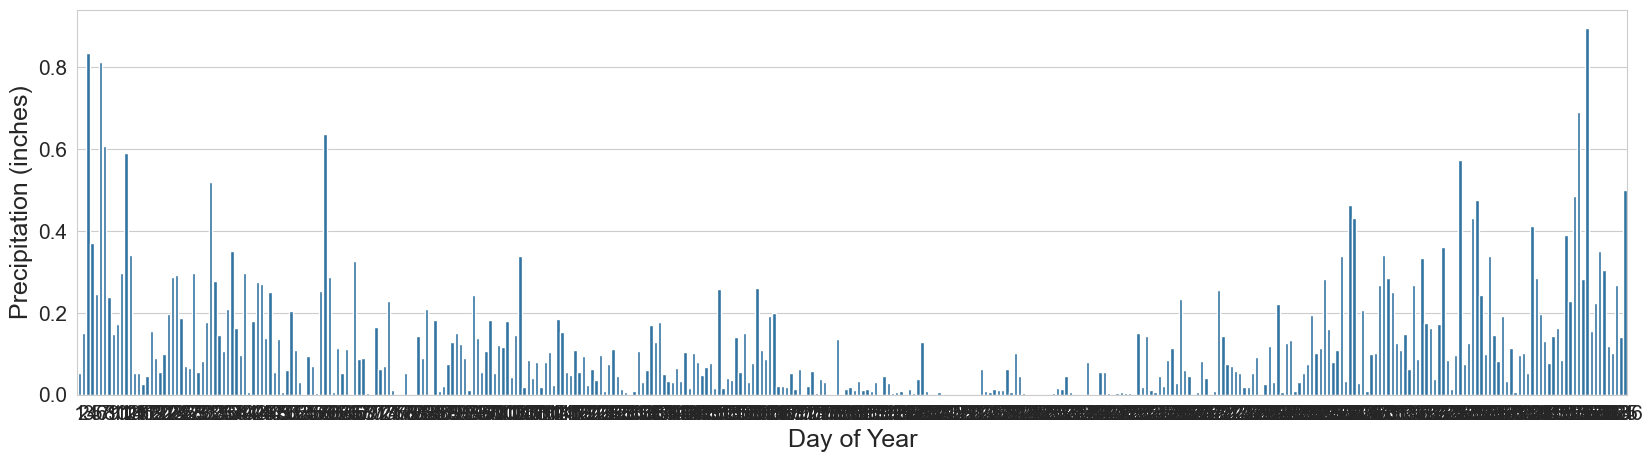

In [151]:
plt.figure(figsize = (20,5))
sns.barplot(data=mean_day_precipitation, x='day_of_year', y='precipitation')
plt.xlabel('Day of Year', fontsize = 18)
plt.ylabel('Precipitation (inches)', fontsize = 18)
plt.tick_params(labelsize = 15)
plt.show()

In [152]:
df.head()

,DATE,city,precipitation,day_of_year
0,2018-01-01,GRR,0.03,1
1,2018-01-02,GRR,0.01,2
2,2018-01-03,GRR,0.06,3
3,2018-01-04,GRR,0.00,4
4,2018-01-05,GRR,0.00,5


In [153]:
df['precipitation'].isna() == True

0       False
1       False
2       False
3       False
4       False
        ...  
3647    False
3648    False
3649    False
3650    False
3651    False
Name: precipitation, Length: 3652, dtype: bool

In [154]:
indices = np.where(df['precipitation'].isna() == True)[0]

In [155]:
indices

array([1834, 1835, 1836, 1837, 1838, 1839, 1840, 1841, 1842, 1843, 1844,
       1845, 1846, 1847, 1848, 1849, 1850, 1851, 1852, 1853, 1854, 1855,
       1856, 1857, 1858, 1859, 1860, 1861, 1862, 1863, 1864, 1865, 1866,
       1867, 1868, 1869, 1870, 1871, 1872, 1873, 1874, 1875, 1876, 1877,
       1878, 1879, 1880, 1881, 1882, 1883, 1884, 1885, 1886, 1887, 1888,
       1889, 1890, 1891, 1892, 1893, 1894, 1895, 2090, 2131, 2132, 2133,
       2134, 2135, 2136, 2137, 2138, 2139, 2140, 2195, 2196, 2197, 2214,
       2215, 2244, 2245, 2246, 2247, 2248, 2249, 2286, 2287, 2288, 2362,
       2363, 2368, 2369, 2370, 2371, 2372, 2373, 2374, 2375, 2376, 2377,
       2417, 2418, 2419, 2420, 2421, 2422, 2423, 2517, 2518, 2519, 2520,
       2521, 2522, 2523, 2524, 2559, 2560, 2561, 2602, 2603, 2604, 2605,
       2606, 2607, 2608, 2609, 2610, 2611, 2612, 2818, 2819, 2820, 2821,
       2822, 2823, 2824, 2825, 2826, 2827, 2972, 2973, 2974, 2975, 2983,
       2984, 2986, 2987, 2988, 3000, 3001, 3004, 30

In [166]:
for index in indices:
    df.loc[index, 'precipitation'] = mean_day_precipitation.loc[df.loc[index, 'day_of_year']].values[0]

#### So, what is the results of the comparison?

Does Seattle have more rainfall than Grand Rapids? Let's see the data.

In [170]:
# Filter data for each city
seattle_data = df[df['city'] == 'SEA']
grand_rapids_data = df[df['city'] == 'GRR']

# Calculate average precipitation
seattle_avg = seattle_data['precipitation'].mean()
grand_rapids_avg = grand_rapids_data['precipitation'].mean()

# Display results
print("=== RAINFALL COMPARISON ===\n")
print(f"Seattle (SEA) - Average Precipitation: {seattle_avg:.4f} inches")
print(f"Grand Rapids (GRR) - Average Precipitation: {grand_rapids_avg:.4f} inches")
print(f"\nDifference: {abs(seattle_avg - grand_rapids_avg):.4f} inches")

if seattle_avg > grand_rapids_avg:
    print(f"Seattle gets {((seattle_avg / grand_rapids_avg - 1) * 100):.1f}% more precipitation")
else:
    print(f"Grand Rapids gets {((grand_rapids_avg / seattle_avg - 1) * 100):.1f}% more precipitation")

=== RAINFALL COMPARISON ===

Seattle (SEA) - Average Precipitation: 0.1133 inches
Grand Rapids (GRR) - Average Precipitation: 0.1184 inches

Difference: 0.0051 inches
Grand Rapids gets 4.5% more precipitation


#### Export the clean .csv file

We'll export a clean data file and then plot that data in a format that shows rainfall between Seattle and Grand Rapids.

In [159]:
df.to_csv('clean_seattle_grandrapids_weather.csv', encoding='utf-8-sig', index=False)

#### Now let's plot some data

Let's plot data that shows the Seattle precipitation compared to Grand Rapids. There are a couple of plots to see. One is a line plot. The other is a bar plot. 

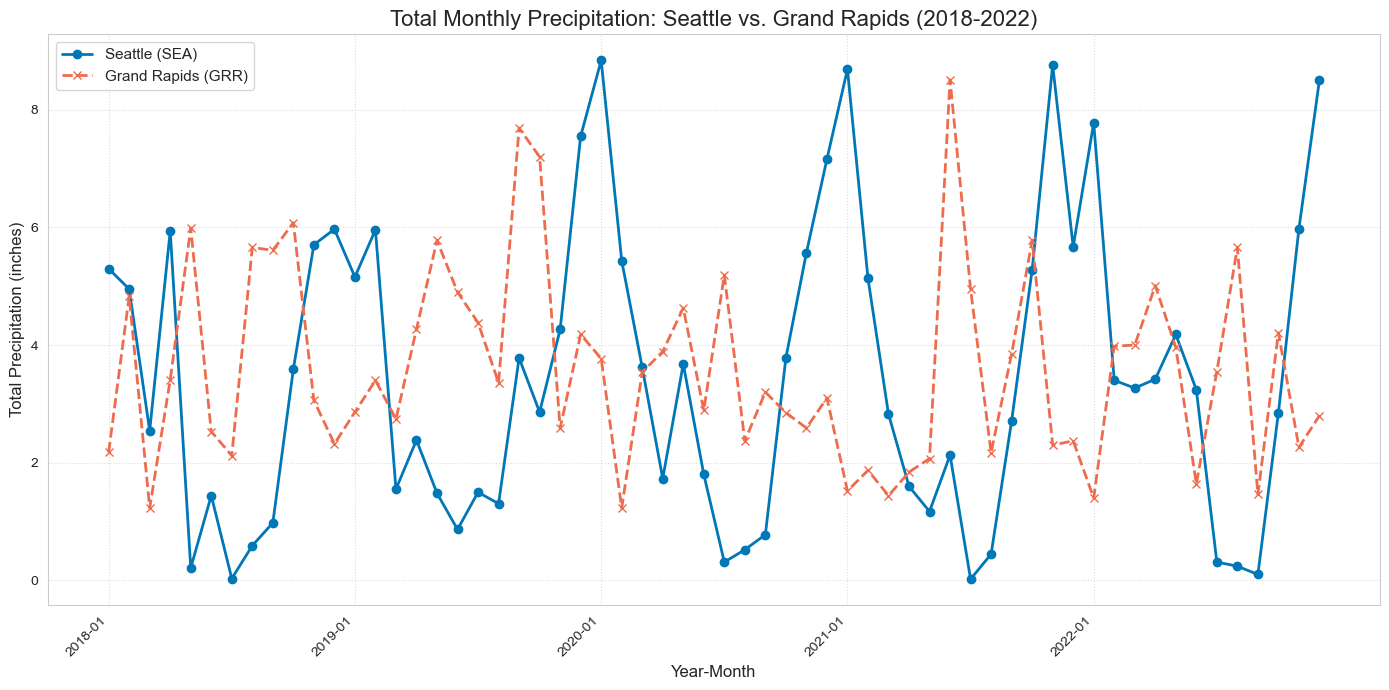

In [160]:
# Load the dataset
df = pd.read_csv('clean_seattle_grandrapids_weather.csv')

# Convert the 'DATE' column to datetime objects
df['DATE'] = pd.to_datetime(df['DATE'])

# Extract Year and Month
df['year'] = df['DATE'].dt.year
df['month'] = df['DATE'].dt.month

# Calculate the total precipitation for each month, year, and city
monthly_precip = df.groupby(['year', 'month', 'city'])['precipitation'].sum().reset_index()

# Pivot the table to create separate columns for each city's precipitation
precip_pivot = monthly_precip.pivot_table(
    index=['year', 'month'],
    columns='city',
    values='precipitation'
).reset_index()

# Create a combined 'Year-Month' string for a clear x-axis
precip_pivot['year_month'] = precip_pivot['year'].astype(str) + '-' + precip_pivot['month'].astype(str).str.zfill(2)


# --- Visualization ---
plt.figure(figsize=(14, 7))

# Plot the total monthly precipitation for both cities
plt.plot(precip_pivot['year_month'], precip_pivot['SEA'], label='Seattle (SEA)', marker='o', linestyle='-', color='#0077b6', linewidth=2)
plt.plot(precip_pivot['year_month'], precip_pivot['GRR'], label='Grand Rapids (GRR)', marker='x', linestyle='--', color='#ee6c4d', linewidth=2)

plt.title('Total Monthly Precipitation: Seattle vs. Grand Rapids (2018-2022)', fontsize=16)
plt.xlabel('Year-Month', fontsize=12)
plt.ylabel('Total Precipitation (inches)', fontsize=12)
plt.legend(fontsize=11)
plt.grid(True, linestyle=':', alpha=0.7)

# Adjust x-axis ticks for better readability by only showing one label per year (Jan)
x_ticks = [i for i, label in enumerate(precip_pivot['year_month']) if label.endswith('-01')]
x_labels = [precip_pivot['year_month'].iloc[i] for i in x_ticks]
plt.xticks(x_ticks, x_labels, rotation=45, ha='right')

plt.tight_layout()
plt.savefig('monthly_yearly_precipitation_comparison.png')
# plt.show()

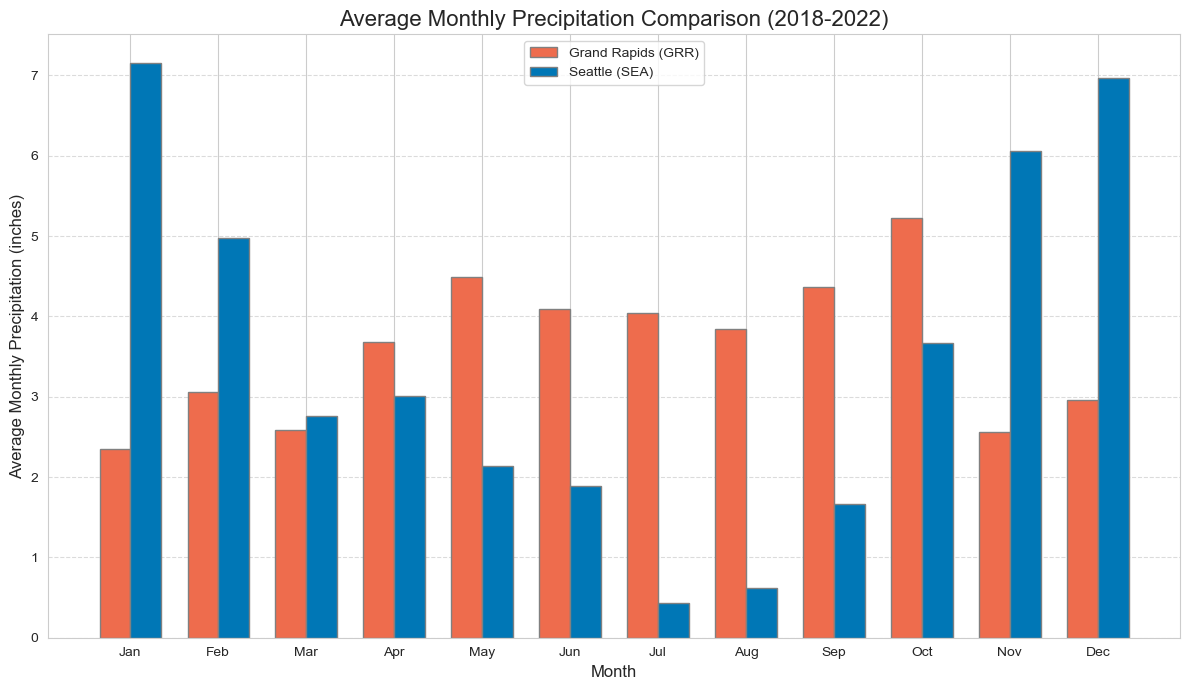

In [161]:
# Load the dataset
df = pd.read_csv('clean_seattle_grandrapids_weather.csv')

# Convert the 'DATE' column and extract month/year
df['DATE'] = pd.to_datetime(df['DATE'])
df['year'] = df['DATE'].dt.year
df['month'] = df['DATE'].dt.month

# Determine the number of unique years to use for averaging
num_years = df['year'].nunique()

# Group by month and city, summing the precipitation across all years
monthly_avg_precip = df.groupby(['month', 'city'])['precipitation'].sum().reset_index()

# Calculate the average monthly precipitation
monthly_avg_precip['avg_monthly_precip'] = monthly_avg_precip['precipitation'] / num_years

# Pivot the data for easy plotting
precip_pivot_avg = monthly_avg_precip.pivot(
    index='month',
    columns='city',
    values='avg_monthly_precip'
)

# --- Visualization: Grouped Bar Chart ---
fig, ax = plt.subplots(figsize=(12, 7))

# Set bar width and positions
bar_width = 0.35
month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
r1 = np.arange(len(month_labels))
r2 = [x + bar_width for x in r1]

# Create the bars
ax.bar(r1, precip_pivot_avg['GRR'], color='#ee6c4d', width=bar_width, edgecolor='grey', label='Grand Rapids (GRR)')
ax.bar(r2, precip_pivot_avg['SEA'], color='#0077b6', width=bar_width, edgecolor='grey', label='Seattle (SEA)')

# Add labels, title, and ticks
ax.set_title(f'Average Monthly Precipitation Comparison ({df["year"].min()}-{df["year"].max()})', fontsize=16)
ax.set_xlabel('Month', fontsize=12)
ax.set_ylabel('Average Monthly Precipitation (inches)', fontsize=12)
ax.set_xticks([r + bar_width / 2 for r in r1])
ax.set_xticklabels(month_labels)
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.savefig('average_monthly_precipitation_barchart.png')
# plt.show()